In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from rl_equation_solver.utilities.tuner import Tuner
from rl_equation_solver.agent.a2c import Agent
from rex import init_logger

import matplotlib.pyplot as plt
import numpy as np
from rl_equation_solver.utilities.utilities import to_vec

In [3]:
init_logger(__name__, log_level="INFO")
init_logger("rl_equation_solver", log_level="INFO")

<Logger rl_equation_solver (INFO)>

## Run agent until solution is found a single time for sets of hyperparameters ##

In [4]:
params = {
          'gamma': [0.9], #[0.7, 0.8, 0.9]
          'entropy_coef': [0.2, 0.3],
          'critic_coef': [0.7, 0.9],
          'update_freq': [10],
          'state_dim': [128],
          "learning_rate": [5e-4]
          }
run_number = 15
max_workers = 32

tuner = Tuner(params=params, run_number=run_number, max_workers=max_workers, agent=Agent)


In [5]:
tuner.run()

INFO - 2023-05-07 14:34:21,413 [algebraic.py:116] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INFO - 2023-05-07 14:34:21,414 [algebraic.py:116] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INFO - 2023-05-07 14:34:21,414 [algebraic.py:116] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INFO - 2023-05-07 14:34:21,415 [algebraic.py:116] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INFO - 2023-05-07 14:34:21,415 [algebraic.py:116] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INFO - 2023-05-07 14:34:21,415 [algebraic.py:121] : Using reward function: diff_loss_reward.
INFO - 2023-05-07 14:34:21,415 [algebraic.py:116] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INFO - 2023-05-07 14:34:21,415 [algebraic.py:116] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INFO - 2023-05-07 14:34:21,416 [algebraic.py:116] : Initializing environment with order=2, |S| = 10 x 128 = 1280
INF

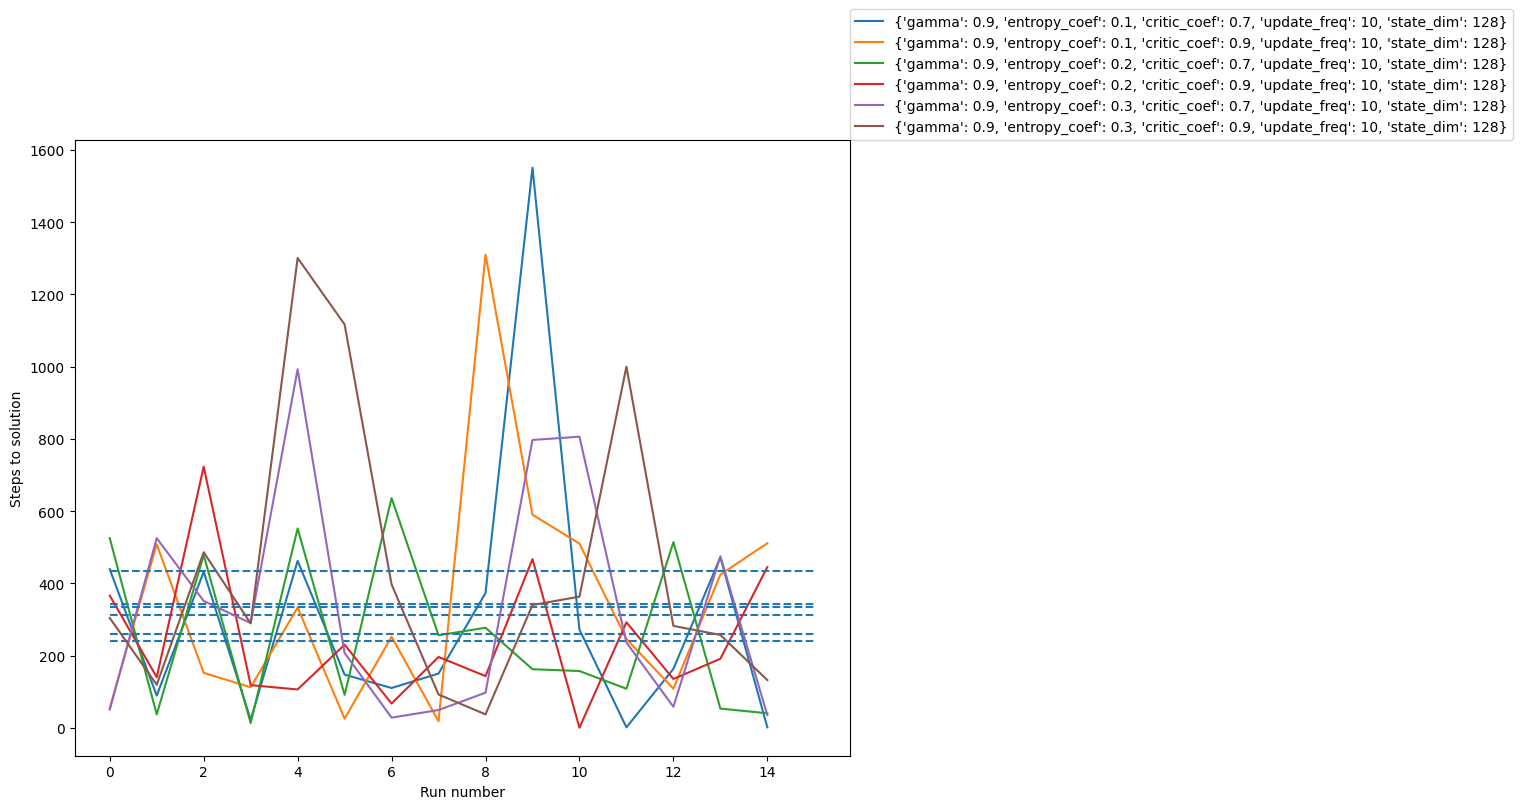

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
avgs = {k: np.mean(tuner.solution_steps[k]) for k in tuner.solution_steps}
for i, config in tuner.configs.items():
    ax.plot(tuner.solution_steps[i], label=str(config))
    ax.hlines(xmin=0, xmax=len(tuner.solution_steps[i]), y=avgs[i], linestyles='--')
ax.set_ylabel("Steps to solution")
ax.set_xlabel("Run number")
plt.legend(loc=(1, 1))

In [7]:
tuner.configs[np.argmin(list(avgs.values()))]

{'gamma': 0.9,
 'entropy_coef': 0.2,
 'critic_coef': 0.9,
 'update_freq': 10,
 'state_dim': 128}